## Ludwig, 2020 Code to Caluclate Xray Luminosity for Binary Stripped Star - Neutron Star Source.  
## Calculation by Ylva Gotberg  
  
### Dependencies :  
https://pypi.org/project/tabula-py/
and latex (for plots)

In [1]:
import tabula
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import colors
import astropy.constants as const
import astropy.units as u

from matplotlib import rc
from matplotlib import cm

fsize = 30
# Works on ubuntu, challenging on windows
#rc("font", **{"family": "serif", "serif": ["Times"], "size": fsize})
#rc("text", usetex=True)

# Seems to work on windows.
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times']
rcParams['font.size'] = fsize

In [2]:
# From Ylva's 2018 paper 


file = "https://arxiv.org/pdf/1802.03018.pdf"
table = tabula.read_pdf(file, pages="22", multiple_tables=False, silent=True)

# Clean Up the Table, Store units in case I need it later.
df = table[0]
units = df.iloc[0]
df = df.drop([0])
df = df.drop(["Group"], axis=1)
df["Minit"] = (
    np.array([re.findall("\d+\.\d+", str) for str in df["Minit"]])
    .flatten()
    .astype(float)
)
df

,Minit,Pinit,Mstrip,"MH,tot",log10 L,log10 LH,T?,Teff,log10 geff,Reff,"XH,s","XHe,s",log10 Ṁwind,Γe,v∞,log10 Q0,log10 Q1,log10 Q2
1,2.00,4.6,0.37,0.003,0.7,-0.9,21.7,21.6,5.55,0.17,1.00,0.00,-12.0,0.000,1370,41.2,37.4,30.8
2,2.21,4.9,0.42,0.004,1.1,-0.5,25.3,25.2,5.56,0.18,1.00,0.00,-12.0,0.001,1430,42.1,38.9,31.4
3,2.44,5.3,0.47,0.005,1.3,-0.3,27.8,27.7,5.54,0.19,1.00,0.00,-12.0,0.001,1450,42.7,40.4,35.6
4,2.70,5.6,0.54,0.006,1.5,-0.1,30.4,30.2,5.51,0.21,0.96,0.04,-12.0,0.002,1480,43.5,41.0,35.2
5,2.99,6.0,0.62,0.007,1.8,0.2,32.9,32.8,5.47,0.24,0.96,0.04,-12.0,0.003,1500,44.4,43.3,38.4
6,3.30,6.4,0.7,0.008,2.0,0.5,35.4,35.2,5.44,0.26,0.96,0.04,-12.0,0.004,1520,45.1,44.3,39.2
7,3.65,6.8,0.8,0.01,2.2,0.8,38.6,38.4,5.44,0.28,0.52,0.48,-12.0,0.005,1570,45.6,44.3,38.6
8,4.04,7.3,0.92,0.012,2.4,1.0,40.7,40.5,5.39,0.32,0.51,0.49,-11.2,0.006,1570,45.9,45.0,38.2
9,4.46,7.8,1.05,0.015,2.6,1.3,43.3,43.1,5.35,0.36,0.58,0.42,-10.5,0.009,1600,46.2,45.6,39.6
10,4.93,8.3,1.2,0.019,2.8,1.6,45.6,45.4,5.3,0.4,0.50,0.50,-10.0,0.012,1600,46.5,45.9,40.2


# $ L = \eta \epsilon \frac{G M_{ns}\dot{M}_{acc}}{R_{NS}}$  
  
# $ \dot{M}_{acc} = \frac{G^2 M_{NS}^2}{v_{relative}^3 a^2 v_{wind}} |\dot{M}_{wind}|$

# $ v_{wind}(r) = v_\infty (1 - \frac{R_{star}}{r})^\beta $

# $ v_{relative} = \sqrt{v_{wind}(r)^2 + v_{orbit}^2}$

## $\eta$ : 

In [3]:
eta_table = tabula.read_pdf(
    "http://www.tassosfragos.com/wp-content/uploads/2014/09/apj_764_1_41.pdf",
    pages="6",
    multiple_tables=False,
    silent=True,
)
eta_table[0]

,Unnamed: 0,Absorption Corrected,Absorption Uncorrected
0,NaN,High-Soft State Low-Hard State,High-Soft State Low-Hard State
1,Energy Band,NS BH NS BH,NS BH NS BH
2,0.3–2 keV,0.06 ± 0.09 0.28 ± 0.20 0.08 ± 0.06 0.13 ± 0.11,0.05 ± 0.08 0.09 ± 0.10 0.05 ± 0.03 0.08 ± 0.06
3,0.3–7 keV,0.61 ± 0.09 0.75 ± 0.18 0.29 ± 0.12 0.36 ± 0.13,0.57 ± 0.09 0.48 ± 0.14 0.25 ± 0.08 0.30 ± 0.08
4,0.3–8 keV,0.67 ± 0.09 0.78 ± 0.16 0.31 ± 0.12 0.39 ± 0.13,0.63 ± 0.09 0.51 ± 0.13 0.27 ± 0.09 0.33 ± 0.10
5,0.3–10 keV,0.77 ± 0.08 0.82 ± 0.13 0.36 ± 0.13 0.43 ± 0.13,0.73 ± 0.08 0.55 ± 0.12 0.32 ± 0.10 0.38 ± 0.10
6,0.5–2 keV,0.06 ± 0.09 0.26 ± 0.19 0.08 ± 0.06 0.12 ± 0.09,0.05 ± 0.08 0.09 ± 0.10 0.05 ± 0.03 0.07 ± 0.05
7,0.5–10 keV,0.77 ± 0.08 0.80 ± 0.11 0.36 ± 0.13 0.42 ± 0.13,0.73 ± 0.07 0.55 ± 0.12 0.32 ± 0.10 0.37 ± 0.10
8,2–10 keV,0.71 ± 0.08 0.54 ± 0.12 0.28 ± 0.09 0.30 ± 0.11,0.68 ± 0.07 0.46 ± 0.09 0.27 ± 0.08 0.30 ± 0.11


## $\epsilon$ : 

Per https://arxiv.org/pdf/1207.3113.pdf this varies between 0.01 and 0.1. Ish? Table 1 seems more complicated... I haven't carefully read this yet.

# For Period, V_orbit, assume Kepler's laws : 
## Note: For a tight orbit, assume circular geometry, a = r (distance between orbitting object and stripped star)   
## $ P^2 = \frac{4\pi^2}{G}\frac{a^3}{(M_1 + M_2)} $  
## $ P = \frac{2\pi}{v_{orbit}} $  
## $ v_{orbit} = \frac{2\pi}{P} a $

In [4]:
units

Group               NaN
Minit              [M ]
Pinit            [days]
Mstrip             [M ]
MH,tot             [M ]
log10 L            [L ]
log10 LH           [L ]
T?                 [kK]
Teff               [kK]
log10 geff     [cm s−2]
Reff               [R ]
XH,s                NaN
XHe,s               NaN
log10 Ṁwind    [M yr−1]
Γe                  NaN
v∞             [km s−1]
log10 Q0          [s−1]
log10 Q1          [s−1]
log10 Q2          [s−1]
Name: 0, dtype: object

In [5]:
class xray:
    def __init__(
        self,
        M_stripped,
        R_stripped,
        period,
        v_inf,
        dM_wind,
        M_NS=1.4 * const.M_sun,
        R_NS=10 * u.km,
        M_BH=5 * const.M_sun,
        M_WD=0.6 * const.M_sun,
        R_WD=0.005 * const.R_sun,
        beta=1,
        alpha=1.5,
        hydrogen_mass_fraction=0.02,
    ):

        self.beta = beta

        self.alpha = alpha

        self.dM_wind = np.abs(dM_wind) * const.M_sun / u.year

        # Add units to quantities
        self.period = period * u.day

        self.M_stripped = M_stripped * const.M_sun

        self.R_stripped = R_stripped * const.R_sun

        # Black Hole
        self.R_schwarzschild = 2 * const.G * M_BH / const.c ** 2

        self.R_bh_accretion = 3 * self.R_schwarzschild

        self.v_inf = v_inf * u.km / u.s

        # Calculate Eddington Luminosity
        self.kramers_opacity = 0.02 * (1 + hydrogen_mass_fraction) * u.cm ** 2 / u.g

        self.neutron_star_luminosity = self.calculate_luminosity(M_NS, R_NS)

        self.black_hole_luminosity = self.calculate_luminosity(
            M_BH, self.R_bh_accretion
        )  # Don't know if this is the right R?

        self.white_dwarf_luminosity = self.calculate_luminosity(M_WD,R_WD)
        
    def calculate_luminosity(self, companion_mass, companion_radius):

        G = const.G

        # Calculate "a" or distance between companion and stripped star
        self.distance = (
            self.period ** 2 * G * (self.M_stripped + companion_mass) / (4 * np.pi ** 2)
        ) ** (1 / 3)

        # Calculate Eddington
        self.L_eddington = (
            4 * np.pi * const.c * const.G * companion_mass / self.kramers_opacity
        ).to(u.erg / u.s)

        self.dM_eddington = self.L_eddington / (const.c ** 2)

        # Calculate orbital, wind, and relative velocities
        self.omega_orbit = 2 * np.pi / self.period

        self.v_orbit = self.omega_orbit * self.distance

        self.v_wind = self.v_inf * (1 - self.R_stripped / self.distance) ** self.beta

        self.v_relative = np.sqrt(self.v_wind ** 2 + self.v_orbit ** 2)

        # Calculate Mass Accretion Rate
        self.dM_acc = (self.alpha * G ** 2 * companion_mass ** 2 * self.dM_wind) / (
            2 * self.v_relative ** 3 * self.distance ** 2 * self.v_wind
        )

        # Calculate Uncorrected Luminosity
        self.L_uncorrected = (G * companion_mass * self.dM_acc / companion_radius).to(
            u.erg / u.s
        )

        # Calculate correction Factors eta and epsilon.

        if self.L_uncorrected > 0.1 * self.L_uncorrected:

            self.epsilon = 1

        elif self.L_uncorrected < 0.1 * self.L_uncorrected:

            self.epsilon = self.calculate_ADAF_efficiency(
                self.dM_acc, self.dM_eddington
            )

        if self.L_uncorrected > 0.05 * self.L_eddington:
            # High Soft State
            self.eta = 0.77

        elif self.L_uncorrected < 0.05 * self.L_eddington:
            # Low Hard State
            self.eta = 0.36

        # Calculate Final Luminosity
        self.L = self.L_uncorrected * self.epsilon * self.eta

        return self.L

        # This is epsilon

    def calculate_ADAF_efficiency(self, Mdot, Mdot_edd, delta=0.01):
        """
        Written by Ylva/Katie. 
        Calculate the mass-luminosity efficiency based on the ADAF
        model of Xie & Yuan (2012), using the piecewise fitting function
        using values provided their Table 1 for their Equation 11.

        Args:
            Mdot : mass transfer rate onto a BH [msun/year]
            Mdot_edd : Eddington mass transfer rate (same units as Mdot)
            delta : (optional) fraction of ionization energy acting on electrons

        Returns:
            epsilon : mass-light conversion efficiency
        """

        M_ratio = Mdot / Mdot_edd

        if not delta in [0.5, 0.1, 0.01, 0.001]:
            print("You must provide an acceptable value for delta.")
            sys.exit(-1)

        if delta == 0.5:
            conds = [
                M_ratio < 2.9e-5,
                (M_ratio >= 2.9e-5) & (M_ratio < 3.3e-3),
                (M_ratio >= 3.3e-3) & (M_ratio < 5.3e-3),
                M_ratio >= 5.3e-3,
            ]
            func_epsilon = [
                lambda M_ratio: 1.58 * (100 * M_ratio) ** 0.65,
                lambda M_ratio: 0.055 * (100 * M_ratio) ** 0.076,
                lambda M_ratio: 0.17 * (100 * M_ratio) ** 1.12,
                lambda M_ratio: 0.1,
            ]

        if delta == 0.1:
            conds = [
                M_ratio < 9.4e-5,
                (M_ratio >= 9.4e-5) & (M_ratio < 5.0e-3),
                (M_ratio >= 5.0e-3) & (M_ratio < 6.6e-3),
                M_ratio >= 6.6e-3,
            ]
            func_epsilon = [
                lambda M_ratio: 0.12 * (100 * M_ratio) ** 0.59,
                lambda M_ratio: 0.026 * (100 * M_ratio) ** 0.27,
                lambda M_ratio: 0.50 * (100 * M_ratio) ** 4.53,
                lambda M_ratio: 0.1,
            ]

        if delta == 1.0e-2:
            conds = [
                M_ratio < 1.6e-5,
                (M_ratio >= 1.6e-5) & (M_ratio < 5.3e-3),
                (M_ratio >= 5.3e-3) & (M_ratio < 7.1e-3),
                M_ratio >= 7.1e-3,
            ]
            func_epsilon = [
                lambda M_ratio: 0.069 * (100 * M_ratio) ** 0.69,
                lambda M_ratio: 0.027 * (100 * M_ratio) ** 0.54,
                lambda M_ratio: 0.42 * (100 * M_ratio) ** 4.85,
                lambda M_ratio: 0.1,
            ]

        if delta == 1.0e-3:
            conds = [
                M_ratio < 7.6e-5,
                (M_ratio >= 7.6e-5) & (M_ratio < 4.5e-3),
                (M_ratio >= 4.5e-3) & (M_ratio < 7.1e-3),
                M_ratio >= 7.1e-3,
            ]
            func_epsilon = [
                lambda M_ratio: 0.065 * (100 * M_ratio) ** 0.71,
                lambda M_ratio: 0.020 * (100 * M_ratio) ** 0.47,
                lambda M_ratio: 0.26 * (100 * M_ratio) ** 3.67,
                lambda M_ratio: 0.1,
            ]
        return np.piecewise(M_ratio, conds, func_epsilon)

In [8]:
df['Mstrip']

1     0.37
2     0.42
3     0.47
4     0.54
5     0.62
6      0.7
7      0.8
8     0.92
9     1.05
10     1.2
11    1.38
12    1.54
13    1.77
14    2.04
15    2.34
16    2.69
17     3.1
18    3.58
19    4.13
20    4.75
21    5.47
22    6.28
23    7.14
Name: Mstrip, dtype: object

In [6]:
def vary_period(period):
    m_stripped = []
    neutron_luminosity = []
    blackhole_luminosity = []
    whitedwarf_luminosity = []
    for n in range(df.shape[0]):
        X = xray(
            df["Mstrip"].iloc[n],
            df["Reff"].iloc[n],
            period,
            df["v∞"].iloc[n],
            10 ** df["log10 Ṁwind"].astype(float).iloc[n] / 10,
        )

        m_stripped.append(df["Mstrip"].astype(float).iloc[n])
        neutron_luminosity.append(np.log10(X.neutron_star_luminosity.value))
        blackhole_luminosity.append(np.log10(X.black_hole_luminosity.value))
        whitedwarf_luminosity.append(np.log10(X.white_dwarf_luminosity.value))

    return m_stripped, neutron_luminosity, blackhole_luminosity, whitedwarf_luminosity


periods = [1 / 24, 2.5 / 24, 6 / 24, 12 / 24, 1, 2, 5, 10]

C:\Users\Betha\Anaconda3\lib\site-packages\astropy\units\quantity.py:481: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


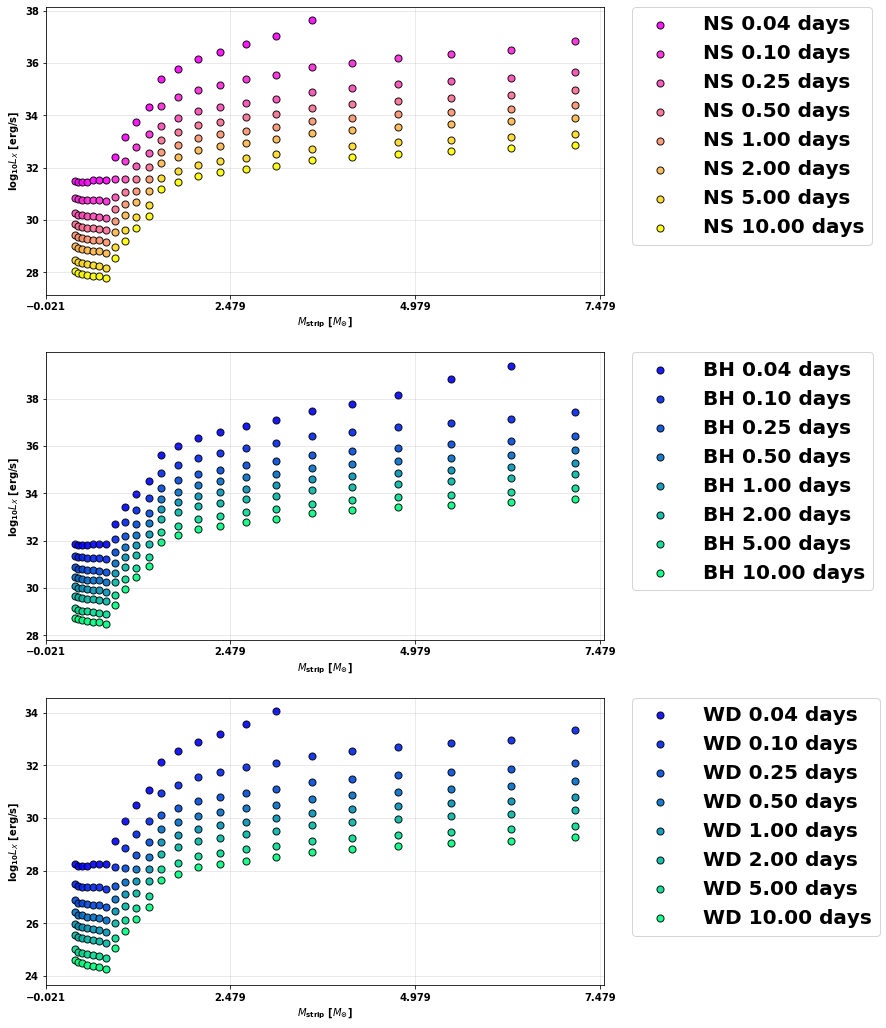

In [7]:
fig, (ax, bx, cx) = plt.subplots(3, 1, figsize=(10, 18))

cmap_ns = cm.get_cmap("spring", len(periods))

cmap_bh = cm.get_cmap("winter", len(periods))

for i, period in enumerate(periods):

    color_ns = colors.rgb2hex(cmap_ns(i)[:3])

    color_bh = colors.rgb2hex(cmap_bh(i)[:3])

    m, ns_l, bh_l, wd_l = vary_period(period)

    ax.scatter(
        m,
        ns_l,
        s=50,
        alpha=0.9,
        label=f" NS {period:0.2f} days",
        c=color_ns,
        edgecolor="black",
    )

    bx.scatter(
        m,
        bh_l,
        s=50,
        alpha=0.9,
        label=f" BH {period:0.2f} days",
        c=color_bh,
        edgecolor="black",
    )
    
    cx.scatter(
        m,
        wd_l,
        s=50,
        alpha=0.9,
        label=f" WD {period:0.2f} days",
        c=color_bh,
        edgecolor="black",
    )

for axis in [ax,bx,cx]:    
    axis.set_xlabel("$M_{\\mathrm{strip}}$ [$M_{\\odot}$]")
    axis.set_ylabel("$\\log_{10} L_X$ [erg/s]")
    start, end = axis.get_xlim()
    stepsize = 2.5
    axis.xaxis.set_ticks(np.arange(start, end, stepsize))
    axis.grid(c="gray", alpha=0.2)
    axis.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0, fontsize=20)



plt.savefig("period.png")